# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]
df_select["trans_date_trans_time"][0]
type(df_select["trans_date_trans_time"][0])
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]
X

<ipython-input-5-b0b71df42019>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
<ipython-input-5-b0b71df42019>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,53,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,519,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0
555715,111.84,28739,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555716,86.88,3684,15,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555717,7.99,129,24,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [8]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [9]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train,y_train)

In [10]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train,y_train)

In [11]:
smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models 

In [12]:
from sklearn.linear_model import LogisticRegression
log_reg_ros = LogisticRegression().fit(over_X, over_y)
log_reg_rus = LogisticRegression().fit(under_X, under_y)
log_reg_smote = LogisticRegression().fit(smote_X, smote_y)

#4.) Test the three models

***Oversampling***

Threshold: 0.6319996049970251


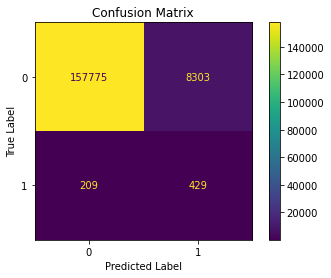

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get the predictions and predicted probabilities for the test set
y_pred_ros = log_reg_ros.predict(X_test)
y_pred_proba_ros = log_reg_ros.predict_proba(X_test)[:, 1]

# Sort the instances by predicted probability in descending order
y_pred_proba_ros_sorted, y_test_sorted = zip(*sorted(zip(y_pred_proba_ros, y_test), reverse=True))

# Initialize the number of false positives and negatives
fp, tn = 0, sum(y_test == 0)

# Iterate through the instances and calculate the FPR
for i, y in enumerate(y_test_sorted):
    if y == 0:
        fp += 1
    fpr = fp / tn
    if fpr > 0.05:
        threshold = y_pred_proba_ros_sorted[i]
        break

# Print the threshold value
print("Threshold:", threshold)

# Classify instances as positive if their probability is greater than the threshold
y_pred_ros_threshold = [1 if p > threshold else 0 for p in y_pred_proba_ros]

# Calculate the confusion matrix to check the results
cm = confusion_matrix(y_test, y_pred_ros_threshold)

#Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

With oversampling, the number of false positives is 8303 while the number of false negatives is 209. 

Threshold: 0.6416191977010337


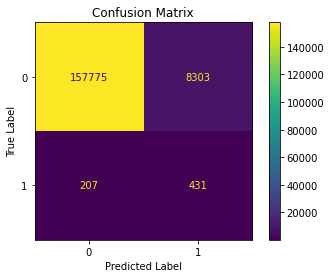

In [14]:
# Get the predictions and predicted probabilities for the test set
y_pred_rus = log_reg_rus.predict(X_test)
y_pred_proba_rus = log_reg_rus.predict_proba(X_test)[:, 1]

# Sort the instances by predicted probability in descending order
y_pred_proba_rus_sorted, y_test_sorted = zip(*sorted(zip(y_pred_proba_rus, y_test), reverse=True))

# Initialize the number of false positives and negatives
fp, tn = 0, sum(y_test == 0)

# Iterate through the instances and calculate the FPR
for i, y in enumerate(y_test_sorted):
    if y == 0:
        fp += 1
    fpr = fp / tn
    if fpr > 0.05:
        threshold = y_pred_proba_rus_sorted[i]
        break

# Print the threshold value
print("Threshold:", threshold)

# Classify instances as positive if their probability is greater than the threshold
y_pred_rus_threshold = [1 if p > threshold else 0 for p in y_pred_proba_rus]

# Calculate the confusion matrix to check the results
cm1 = confusion_matrix(y_test, y_pred_rus_threshold)

#Plot the confusion matrix
disp1 = ConfusionMatrixDisplay(confusion_matrix = cm1)
disp1.plot()

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

With undersampling, the number of false positives is 8303 while the number of false negatives is 207. Compared to oversampling, the undersampling is able to detect more true positives and reduce false negatives.

Threshold: 0.6384259825830165


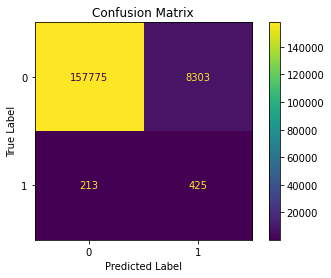

In [15]:
# Get the predictions and predicted probabilities for the test set
y_pred_smote = log_reg_smote.predict(X_test)
y_pred_proba_smote = log_reg_smote.predict_proba(X_test)[:, 1]

# Sort the instances by predicted probability in descending order
y_pred_proba_smote_sorted, y_test_sorted = zip(*sorted(zip(y_pred_proba_smote, y_test), reverse=True))

# Initialize the number of false positives and negatives
fp, tn = 0, sum(y_test == 0)

# Iterate through the instances and calculate the FPR
for i, y in enumerate(y_test_sorted):
    if y == 0:
        fp += 1
    fpr = fp / tn
    if fpr > 0.05:
        threshold = y_pred_proba_smote_sorted[i]
        break

# Print the threshold value
print("Threshold:", threshold)

# Classify instances as positive if their probability is greater than the threshold
y_pred_smote_threshold = [1 if p > threshold else 0 for p in y_pred_proba_smote]

# Calculate the confusion matrix to check the results
cm2 = confusion_matrix(y_test, y_pred_smote_threshold)

#Plot the confusion matrix
disp2 = ConfusionMatrixDisplay(confusion_matrix = cm2)
disp2.plot()

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

With SMOTE, the number of false positives is 8303 while the number of false negatives is 213. SMOTE has the highest number of false negatives and lowest number of true positives.

# 5.) Which performed best in Out of Sample metrics?

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [21]:
acc_ros = accuracy_score(y_test, y_pred_ros)
prec_ros = precision_score(y_test, y_pred_ros)
rec_ros = recall_score(y_test, y_pred_ros)
f1_ros = f1_score(y_test, y_pred_ros)
roc_auc_ros = roc_auc_score(y_test,y_pred_proba_ros)

In [19]:
acc_rus = accuracy_score(y_test, y_pred_rus)
prec_rus = precision_score(y_test, y_pred_rus)
rec_rus = recall_score(y_test, y_pred_rus)
f1_rus = f1_score(y_test, y_pred_rus)
roc_auc_rus = roc_auc_score(y_test,y_pred_proba_rus)

In [20]:
acc_smote = accuracy_score(y_test, y_pred_smote)
prec_smote = precision_score(y_test, y_pred_smote)
rec_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test,y_pred_proba_smote)

In [23]:
df_metrics = pd.DataFrame()
df_metrics['Model'] = ['Oversampling', 'Undersampling','SMOTE']
df_metrics['Accuracy Score'] = [acc_ros, acc_rus, acc_smote]
df_metrics['Precision Score'] = [prec_ros, prec_rus, prec_smote]
df_metrics['Recall Score'] = [rec_ros, rec_rus, rec_smote]
df_metrics['F1 Score'] = [f1_ros, f1_rus, f1_smote]
df_metrics['ROC AUC Score'] = [roc_auc_ros, roc_auc_rus, roc_auc_smote]
df_metrics

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC AUC Score
0,Oversampling,0.814553,0.015210,0.744514,0.029811,0.829058
1,Undersampling,0.809670,0.014915,0.749216,0.029247,0.829251
2,SMOTE,0.821385,0.015754,0.742947,0.030853,0.828463


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [24]:
raw_temp = pd.concat([X_train, y_train], axis = 1)
raw_temp

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,is_fraud
476376,2.32,2328,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
517401,164.61,158701,51,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
546891,60.31,1480,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1557,9.31,263,45,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
178473,5.93,10717,17,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52378,127.28,1087,42,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
151084,498.05,1140,52,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
473352,8.07,73,53,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
304967,7.74,4367,53,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


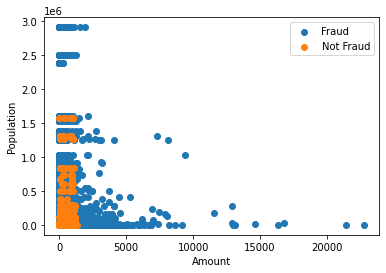

In [26]:
plt.scatter(raw_temp[raw_temp["is_fraud"]==0]["amt"], raw_temp[raw_temp["is_fraud"]==0]["city_pop"])
plt.scatter(raw_temp[raw_temp["is_fraud"]==1]["amt"], raw_temp[raw_temp["is_fraud"]==1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.show()

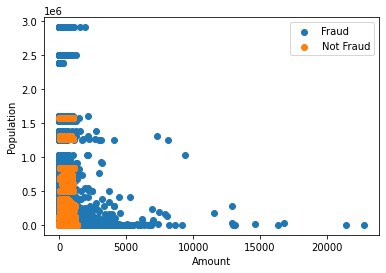

In [29]:
after_smote = pd.concat([smote_X, smote_y], axis = 1)
plt.scatter(after_smote[after_smote["is_fraud"]==0]["amt"], after_smote[after_smote["is_fraud"]==0]["city_pop"])
plt.scatter(after_smote[after_smote["is_fraud"]==1]["amt"], after_smote[after_smote["is_fraud"]==1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.show()